<a href="https://colab.research.google.com/github/Rcabrera1221/Modelo-entrenamiento/blob/main/entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
!pip install gdown


In [ ]:
!gdown --id 1o-ij-D8KK56L4BlfCADdubkxcQJKiSO-


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o-ij-D8KK56L4BlfCADdubkxcQJKiSO-
To: /content/imagenes_trabajo.zip
100% 23.0M/23.0M [00:00<00:00, 54.4MB/s]


In [ ]:
!unzip /content/imagenes_trabajo.zip -d /content/imagenes_descomprimidas


Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_100.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1000.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1001.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1002.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1003.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1004.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1005.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1006.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1007.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1008.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1009.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_101.png  
 extracting: /content/imagenes_descomprimidas/E/E_ori

In [ ]:
!ls /content/imagenes_descomprimidas


E  O  θ  Σ


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
# Ruta donde están las imágenes
ruta_imagenes = '/content/imagenes_descomprimidas'
tamano = (28, 28)  # Tamaño al que redimensionaremos las imágenes
clases = ['E', 'O', 'Σ', 'θ']  # Lista de nombres de clases

In [ ]:
# Variables para guardar imágenes y etiquetas
X = []
y = []

In [ ]:
# Cargar las imágenes desde carpetas clasificadas
for idx, clase in enumerate(clases):
    carpeta_clase = os.path.join(ruta_imagenes, clase)

    # Asegúrate de que la carpeta existe antes de iterar sobre los archivos
    if os.path.exists(carpeta_clase):
        for archivo in os.listdir(carpeta_clase):
            # Verificar si el archivo tiene una extensión de imagen válida
            if archivo.endswith(('jpg', 'jpeg', 'png', 'bmp')):
                ruta_archivo = os.path.join(carpeta_clase, archivo)

                # Leer la imagen en escala de grises y redimensionarla
                imagen = imread(ruta_archivo, as_gray=True)
                imagen_redimensionada = resize(imagen, tamano)

                # Añadir la imagen redimensionada al conjunto de datos
                X.append(imagen_redimensionada)

                # Añadir la etiqueta correspondiente (0 para simbolo1, 1 para simbolo2, etc.)
                y.append(idx)

In [ ]:
# Convertir listas a arreglos numpy
X = np.array(X)
y = np.array(y)


In [ ]:
# Normalizar valores entre 0 y 1
X = X / 255.0

In [ ]:
Visualizar la Distribución de Clases:

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Etiquetas de clases y cantidad de muestras por símbolo
clases = ['E', 'O', 'Σ', 'θ']
cantidad_por_clase = [1250, 1250, 1250, 1250]  # Reemplaza con los valores correctos

<BarContainer object of 4 artists>

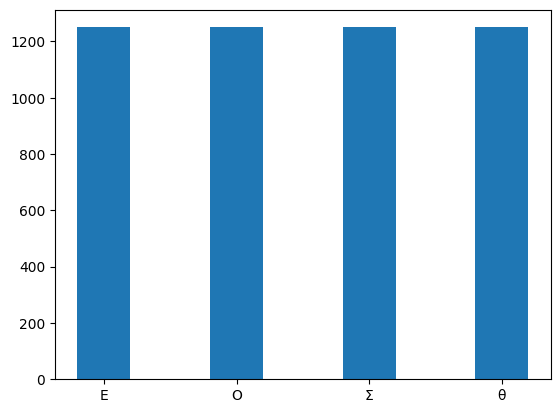

In [ ]:
# Crear el gráfico de barras
plt.figure()
plt.bar(range(len(clases)), cantidad_por_clase, tick_label=clases, width=0.4)  # Cambia `width` para ajustar la separación

In [ ]:
# Definir un diccionario que mapee los operadores a etiquetas numéricas
label_map = {
    'E': 0,
    'O': 1,
    'Σ': 2,
    'θ': 3
}

In [ ]:
y = y.astype(float)

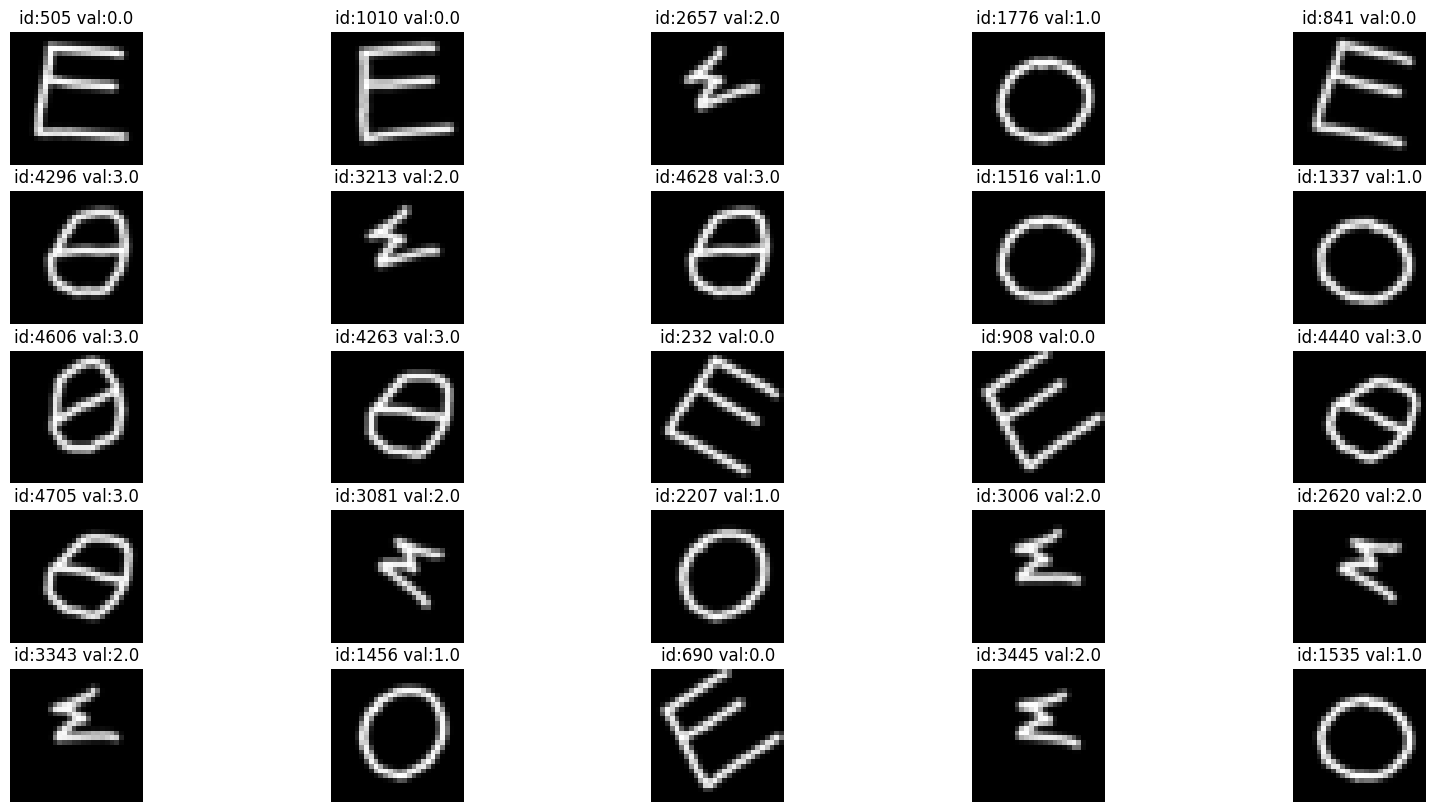

In [ ]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
#Crear el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [ ]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
log = modelo.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
126/126 [==============================] - 1s 4ms/step - loss: 1.7837 - accuracy: 0.2511 - val_loss: 1.4114 - val_accuracy: 0.2498
Epoch 2/50
126/126 [==============================] - 0s 3ms/step - loss: 1.3900 - accuracy: 0.3153 - val_loss: 1.3767 - val_accuracy: 0.2498
Epoch 3/50
126/126 [==============================] - 0s 3ms/step - loss: 1.3664 - accuracy: 0.3058 - val_loss: 1.3529 - val_accuracy: 0.2507
Epoch 4/50
126/126 [==============================] - 0s 3ms/step - loss: 1.3255 - accuracy: 0.5259 - val_loss: 1.2977 - val_accuracy: 0.4336
Epoch 5/50
126/126 [==============================] - 0s 3ms/step - loss: 1.2239 - accuracy: 0.7359 - val_loss: 1.1367 - val_accuracy: 0.7502
Epoch 6/50
126/126 [==============================] - 0s 3ms/step - loss: 1.0058 - accuracy: 0.8888 - val_loss: 0.8575 - val_accuracy: 1.0000
Epoch 7/50
126/126 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.9765 - val_loss: 0.5667 - val_accuracy: 1.0000
Epoch 

In [ ]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.0002
Accuracy = 1.0000


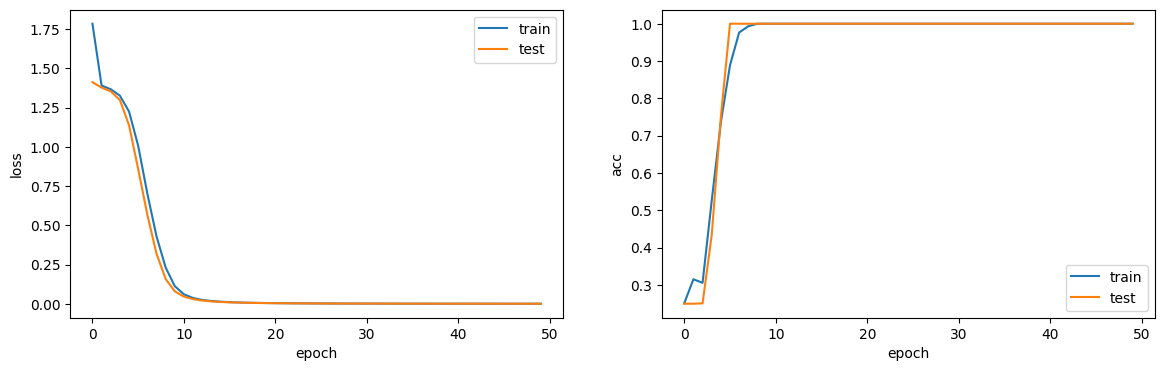

In [ ]:
show_results(modelo, log)

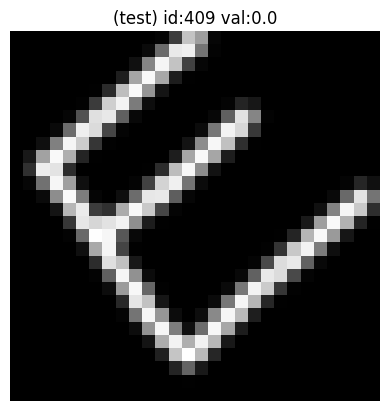

In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im, cmap='gray')
plt.show()

In [ ]:
salida = modelo.predict(im[None])[0]
salida

1/1 [==============================] - 0s 21ms/step


array([9.9964356e-01, 1.1262062e-04, 9.8321863e-05, 1.4551137e-04,
       3.2812617e-09, 2.5851776e-09, 1.5315764e-09, 3.1111487e-09,
       4.0563952e-09, 1.6280054e-09], dtype=float32)

In [ ]:
# Suponiendo que _salida es tu arreglo de datos
indice_max = np.argmax(salida)  # Encuentra el índice del valor máximo
valor_max = salida[indice_max]  # Obtiene el valor máximo

([<matplotlib.axis.XTick at 0x79c0b5f87670>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

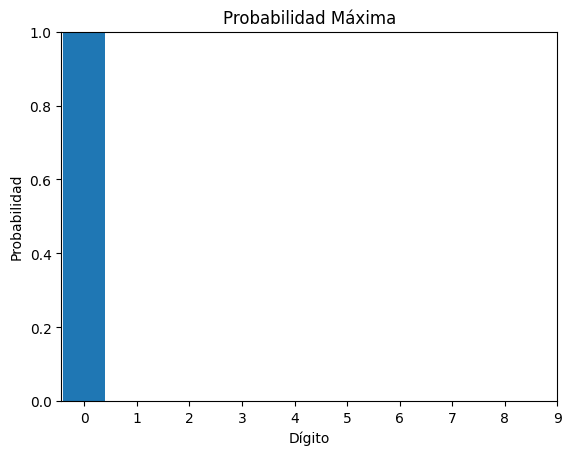

In [ ]:
# Crear la figura y el gráfico
plt.figure()
plt.title("Probabilidad Máxima")
plt.xlabel("Dígito")
plt.ylabel("Probabilidad")
plt.ylim([0, 1])  # Ajusta el límite del eje y si es necesario
plt.bar(indice_max, valor_max)  # Grafica solo la barra con el valor máximo
plt.xticks(range(len(salida)))  # Asegura que los ticks del eje x estén bien etiquetados